<a href="https://colab.research.google.com/github/Maath-Lima/data-science-studies/blob/main/Inside_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model

Carregar o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Exploração dos dados


Text(0.5, 1.0, '9')

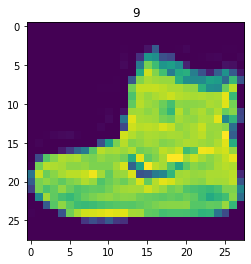

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [ ]:
identificacoes_treino.min()
identificacoes_treino.max()

9

Visualizar as imagens com classificação


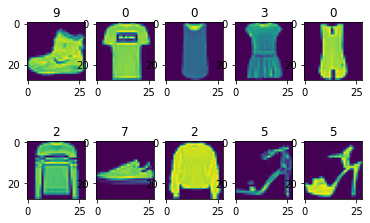

In [ ]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Visualizar as imagens com a classificação nomeada


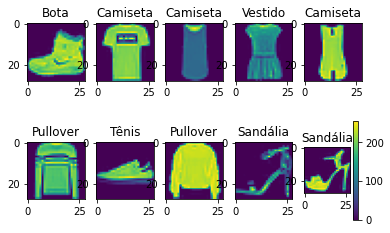

In [ ]:
# Visualizar as imagens com a classificação nomeada
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.colorbar()

Normalizando as imagens

In [ ]:
imagens_treino= imagens_treino/float(255)

Criação do modelo e normalizando com o dropout

In [ ]:
modelo = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(256, activation=tensorflow.nn.relu),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(10, activation=tensorflow.nn.softmax)                 
])

Compilação do modelo

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Treinamento do modelo

In [ ]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 21.8338 - accuracy: 0.3972 - val_loss: 5.2794 - val_accuracy: 0.5962
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 6.4257 - accuracy: 0.5727 - val_loss: 3.4818 - val_accuracy: 0.6847
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 3.7889 - accuracy: 0.6354 - val_loss: 2.6000 - val_accuracy: 0.7003
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4015 - accuracy: 0.6883 - val_loss: 1.4760 - val_accuracy: 0.7056
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4979 - accuracy: 0.7324 - val_loss: 1.0193 - val_accuracy: 0.7777


Súmario do modelo

In [ ]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.10178399,  0.05739379,  0.02270252, ...,  0.03917231,
        -0.08606131, -0.08439014],
       [-0.12454461, -0.04306047,  0.06201907, ..., -0.2382693 ,
        -0.0953707 ,  0.23019865],
       [-0.05906012,  0.1221415 ,  0.05759045, ..., -0.05184782,
         0.01802564,  0.31781065],
       ...,
       [ 0.26362708,  0.03470051, -0.01117287, ..., -0.12932162,
        -0.2130295 ,  0.04213135],
       [ 0.05469953,  0.07413115,  0.06040656, ...,  0.03538663,
        -0.31769377, -0.15536027],
       [-0.06737738, -0.16326971,  0.01977417, ..., -0.05089647,
        -0.14474551, -0.02616628]], dtype=float32)

In [ ]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
'''

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.14906697, 0.90416867, 0.15813112, ..., 0.37277466, 0.504004  ,
         0.01329154],
        [0.6347714 , 0.5709713 , 0.72150654, ..., 0.9491826 , 0.97914577,
         0.37020603],
        [0.59272283, 0.33171377, 0.9260975 , ..., 0.34381124, 0.07656136,
         0.25713575],
        ...,
        [0.96823585, 0.9814706 , 0.66526186, ..., 0.9988011 , 0.7883973 ,
         0.49545592],
        [0.8940604 , 0.8344179 , 0.33812127, ..., 0.38611826, 0.7559852 ,
         0.40608758],
        [0.03372883, 0.45466003, 0.43630165, ..., 0.70578873, 0.8249426 ,
         0.43839687]], dtype=float32),
 array([-4.21835929e-02,  2.06175312e-01, -1.68987624e-02,  6.08537942e-02,
         2.01222196e-01,  4.64259535e-01, -5.07525131e-02,  1.53006002e-01,
         2.28050604e-01,  3.51855099e-01,  3.05476576e-01,  2.37394095e-04,
         1.25686854e-01,  7.57109225e-02,  1.47273736e-02, -2.14284621e-02,
         2.09200576e-01,  1.34776399e-01, -1.97279513e-01,  1.70016572e-01,
         2.216

Vieses da primeira camada dense

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 81.5948 - accuracy: 0.4266 - val_loss: 11.1160 - val_accuracy: 0.7393
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 22.2954 - accuracy: 0.6309 - val_loss: 6.4715 - val_accuracy: 0.7702
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 10.0306 - accuracy: 0.6846 - val_loss: 4.3948 - val_accuracy: 0.7436
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 5.0472 - accuracy: 0.7150 - val_loss: 2.6695 - val_accuracy: 0.7809
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.7184 - accuracy: 0.7453 - val_loss: 1.4952 - val_accuracy: 0.8119


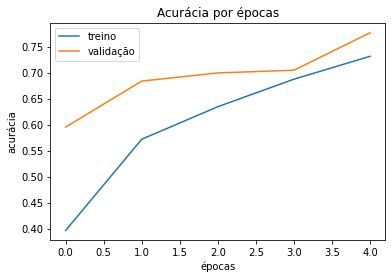

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

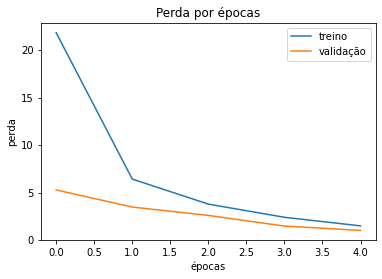

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Salvando e carregando o modelo treinado 

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treinamento e validação por época

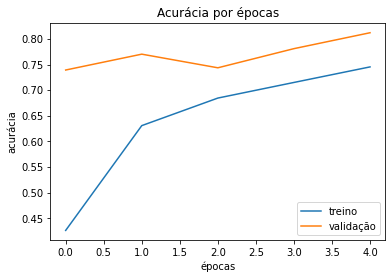

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

Visualizado as perdas de treino e validação por época

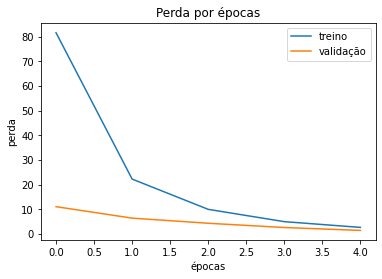

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Testando o modelo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliação do modelo

In [ ]:
perde_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste:', perde_teste)
print('Acurácia do teste:', acuracia_teste)

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)



313/313 [==============================] - 1s 2ms/step - loss: 400.1588 - accuracy: 0.7925
Perda do teste: 400.1588134765625
Acurácia do teste: 0.7925000190734863
